In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [3]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

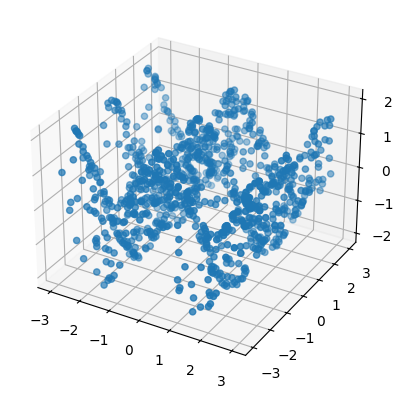

In [4]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [5]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

C:\Users\ar_ar\anaconda3\envs\lithiumbattery\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0129
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0075
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0229 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9458 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8904
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8256
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7805 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6826 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5682
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6005 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6209 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5293
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5785
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5275
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.559

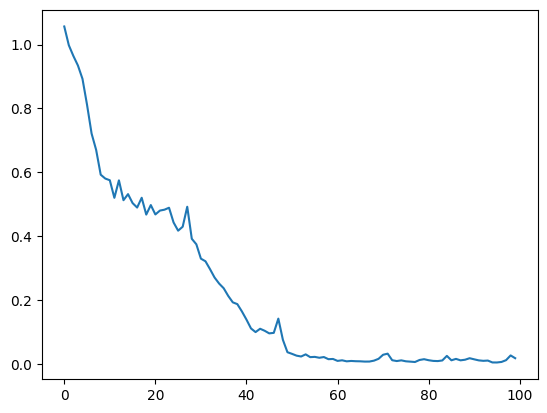

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


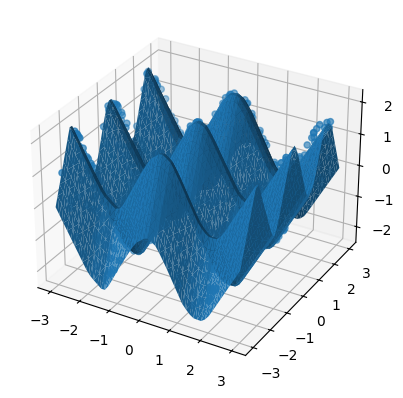

In [8]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


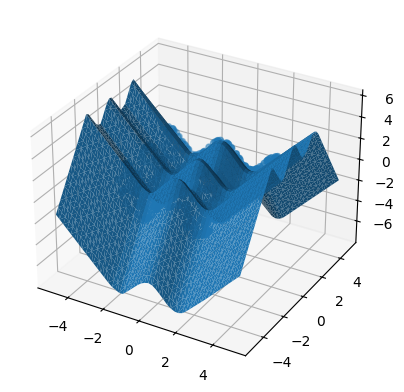

In [9]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()